# Difficulty graphs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime

from sqlalchemy import create_engine
from monitor import config

%matplotlib inline

In [2]:
engine = create_engine(config.DB_CONFIG)
with engine.connect() as conn, conn.begin():
    diff_pow_query = "SELECT time, difficulty FROM blockchain WHERE flags ~ 'proof-of-work'"
    diff_pow_data = pd.read_sql_query(diff_pow_query, conn)
    diff_pow_data.set_index("time", inplace=True)

In [4]:
engine = create_engine(config.DB_CONFIG)
with engine.connect() as conn, conn.begin():
    av_diff_pow_query = """
    SELECT DISTINCT ON (date)
        date_trunc('day', time) as date,
        AVG(difficulty) OVER w AS av_diff
    FROM (
        SELECT * FROM blockchain WHERE flags ~ 'proof-of-work'
    ) pow
    WINDOW w AS (
        PARTITION BY date_trunc('day', time)
    );

    """
    av_diff_pow_data = pd.read_sql_query(av_diff_pow_query, conn)
    av_diff_pow_data.set_index("date", inplace=True)

## PoW difficulty

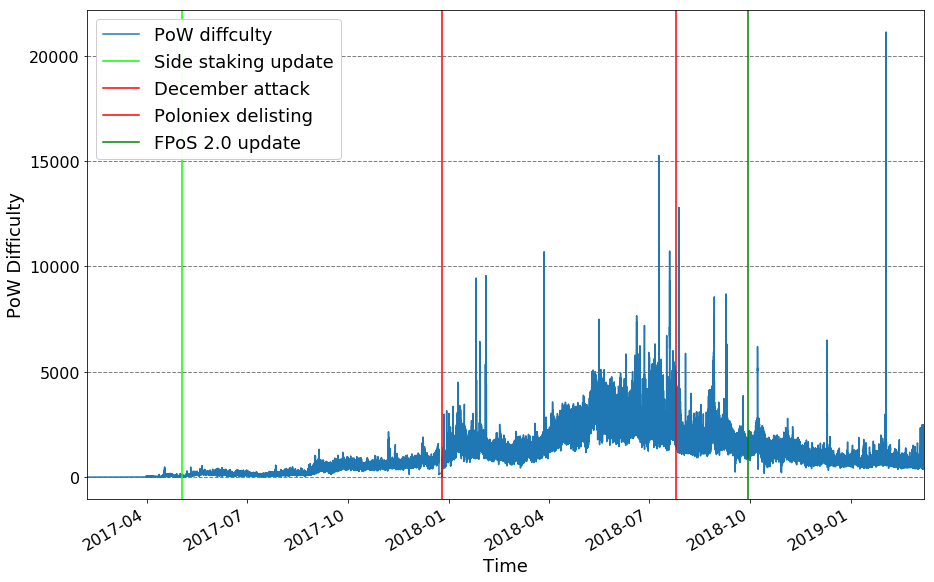

In [6]:
diff_pow_data.plot(
    y="difficulty",
    figsize=(15, 10),
    label="PoW diffculty"
)

ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel('PoW Difficulty', fontsize=18)

plt.axvline(x=datetime(2017, 5, 3), ymin=0, ymax=2, color="lime", label="Side staking update")
plt.axvline(x=datetime(2017, 12, 25), ymin=0, ymax=2, color="red", label="December attack")
plt.axvline(x=datetime(2018, 7,26), ymin=0, ymax=2, color="red", label="Poloniex delisting")
plt.axvline(x=datetime(2018, 9, 29), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")

plt.legend(loc="upper left", framealpha=0.95, prop={"size": 18});

## Average PoW difficulty

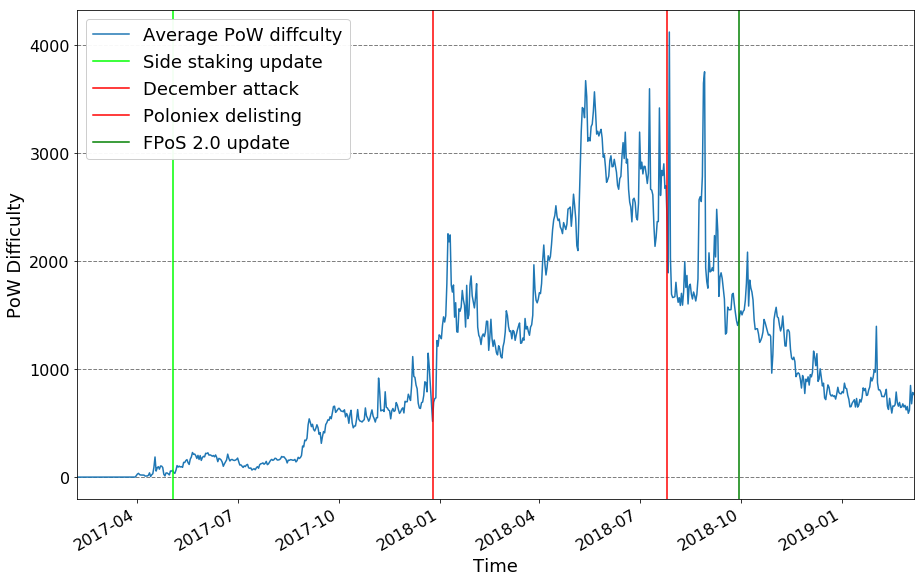

In [7]:
av_diff_pow_data.plot(
    y="av_diff",
    figsize=(15, 10),
    label="Average PoW diffculty"
)

ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel('PoW Difficulty', fontsize=18)

plt.axvline(x=datetime(2017, 5, 3), ymin=0, ymax=2, color="lime", label="Side staking update")
plt.axvline(x=datetime(2017, 12, 25), ymin=0, ymax=2, color="red", label="December attack")
plt.axvline(x=datetime(2018, 7,26), ymin=0, ymax=2, color="red", label="Poloniex delisting")
plt.axvline(x=datetime(2018, 9, 29), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")

plt.legend(loc="upper left", framealpha=0.95, prop={"size": 18});

In [8]:
engine = create_engine(config.DB_CONFIG)
with engine.connect() as conn, conn.begin():
    diff_pos_query = """
    SELECT time, difficulty FROM blockchain 
    WHERE flags ~ 'proof-of-stake' AND
    date_trunc('hour', time)::time NOT IN (time'1:00', time'6:00', time'15:00', time'20:00') AND
    mint > 2
    """
    diff_pos_data = pd.read_sql_query(diff_pos_query, conn)
    diff_pos_data.set_index("time", inplace=True)

In [11]:
engine = create_engine(config.DB_CONFIG)
with engine.connect() as conn, conn.begin():
    av_diff_pos_query = """
    SELECT DISTINCT ON (date)
        date_trunc('day', time) as date,
        AVG(difficulty) OVER w AS av_diff
    FROM (
        SELECT * FROM blockchain
        WHERE flags ~ 'proof-of-stake' AND
        date_trunc('hour', time)::time NOT IN (time'1:00', time'6:00', time'15:00', time'20:00') AND
        mint > 2
    ) pow
    WINDOW w AS (
        PARTITION BY date_trunc('day', time)
    );

    """
    av_diff_pos_data = pd.read_sql_query(av_diff_pos_query, conn)
    av_diff_pos_data.set_index("date", inplace=True)

## PoS difficulty

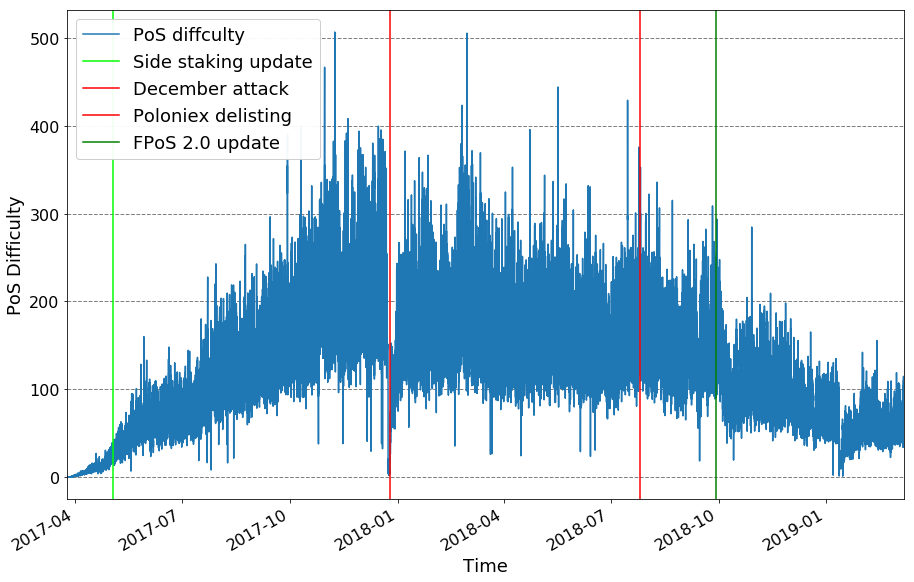

In [10]:
diff_pos_data.plot(
    y="difficulty",
    figsize=(15, 10),
    label="PoS diffculty"
)

ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel('PoS Difficulty', fontsize=18)

plt.axvline(x=datetime(2017, 5, 3), ymin=0, ymax=2, color="lime", label="Side staking update")
plt.axvline(x=datetime(2017, 12, 25), ymin=0, ymax=2, color="red", label="December attack")
plt.axvline(x=datetime(2018, 7,26), ymin=0, ymax=2, color="red", label="Poloniex delisting")
plt.axvline(x=datetime(2018, 9, 29), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")

plt.legend(loc="upper left", framealpha=0.95, prop={"size": 18});

## Average PoS difficulty

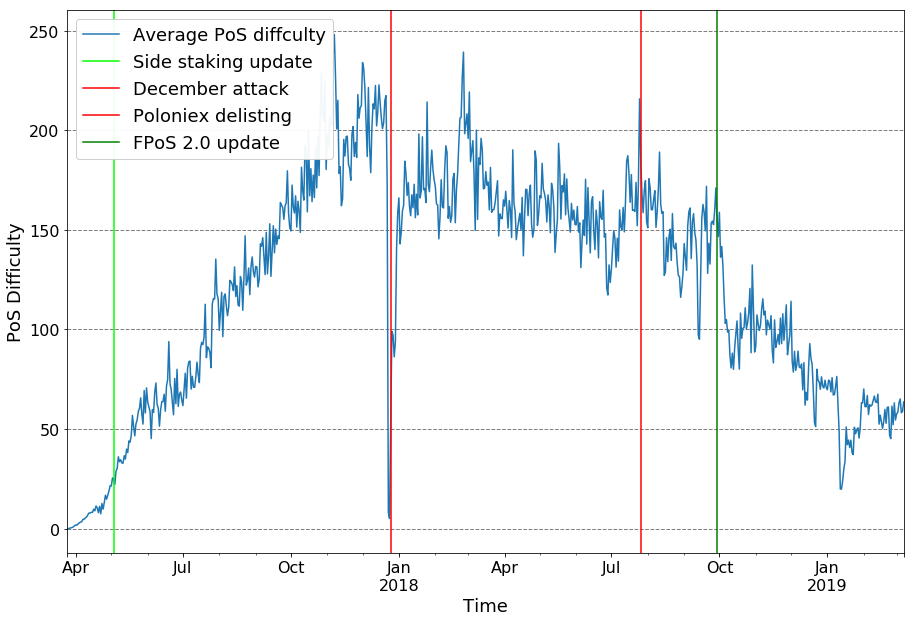

In [13]:
av_diff_pos_data.plot(
    y="av_diff",
    figsize=(15, 10),
    label="Average PoS diffculty"
)

ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel('PoS Difficulty', fontsize=18)

plt.axvline(x=datetime(2017, 5, 3), ymin=0, ymax=2, color="lime", label="Side staking update")
plt.axvline(x=datetime(2017, 12, 25), ymin=0, ymax=2, color="red", label="December attack")
plt.axvline(x=datetime(2018, 7,26), ymin=0, ymax=2, color="red", label="Poloniex delisting")
plt.axvline(x=datetime(2018, 9, 29), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")

plt.legend(loc="upper left", framealpha=0.95, prop={"size": 18});

In [46]:
FPoS20_start_date = "2018-10-01 00:00:00"
pos_fpos20_data = av_diff_pos_data.truncate(before=pd.Timestamp(FPoS20_start_date))

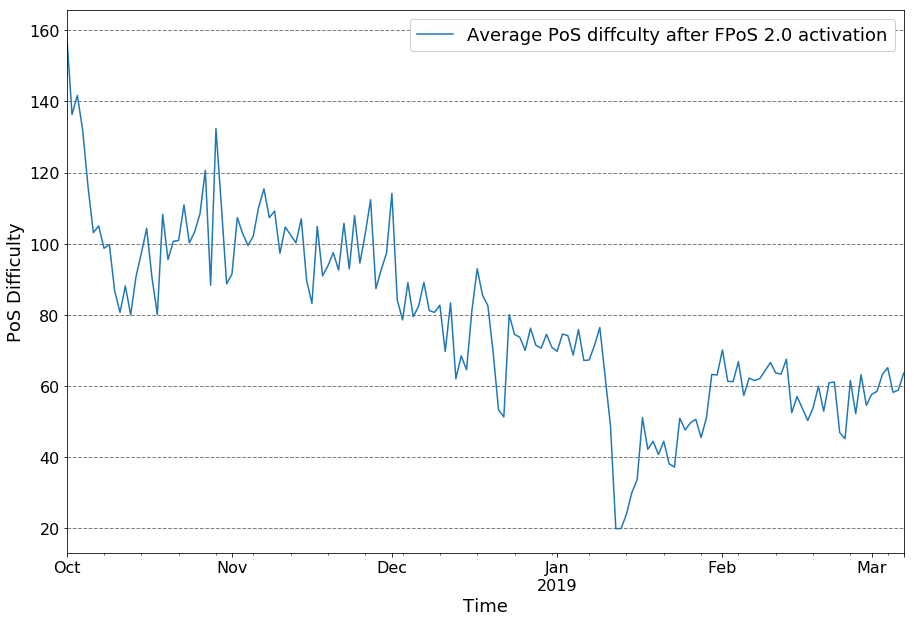

In [74]:
pos_fpos20_data.plot(
    y="av_diff",
    figsize=(15, 10),
    label="Average PoS diffculty after FPoS 2.0 activation"
)

ax = plt.gca()

ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel('PoS Difficulty', fontsize=18)

plt.legend(loc="upper right", framealpha=0.95, prop={"size": 18});

In [41]:
engine = create_engine(config.DB_CONFIG)
with engine.connect() as conn, conn.begin():
    diff_fpos_query = """
    SELECT time, difficulty FROM blockchain 
    WHERE flags ~ 'proof-of-stake' AND
    date_trunc('hour', time)::time IN (time'1:00', time'6:00', time'15:00', time'20:00') AND
    mint > 0.01
    """
    diff_fpos_data = pd.read_sql_query(diff_fpos_query, conn)
    diff_fpos_data.set_index("time", inplace=True)

In [42]:
engine = create_engine(config.DB_CONFIG)
with engine.connect() as conn, conn.begin():
    av_diff_fpos_query = """
    SELECT DISTINCT ON (date)
        date_trunc('day', time) as date,
        AVG(difficulty) OVER w AS av_diff
    FROM (
        SELECT * FROM blockchain
        WHERE flags ~ 'proof-of-stake' AND
        date_trunc('hour', time)::time IN (time'1:00', time'6:00', time'15:00', time'20:00') AND
        mint > 0.01
    ) pow
    WINDOW w AS (
        PARTITION BY date_trunc('day', time)
    );

    """
    av_diff_fpos_data = pd.read_sql_query(av_diff_fpos_query, conn)
    av_diff_fpos_data.set_index("date", inplace=True)

## FPoS difficulty

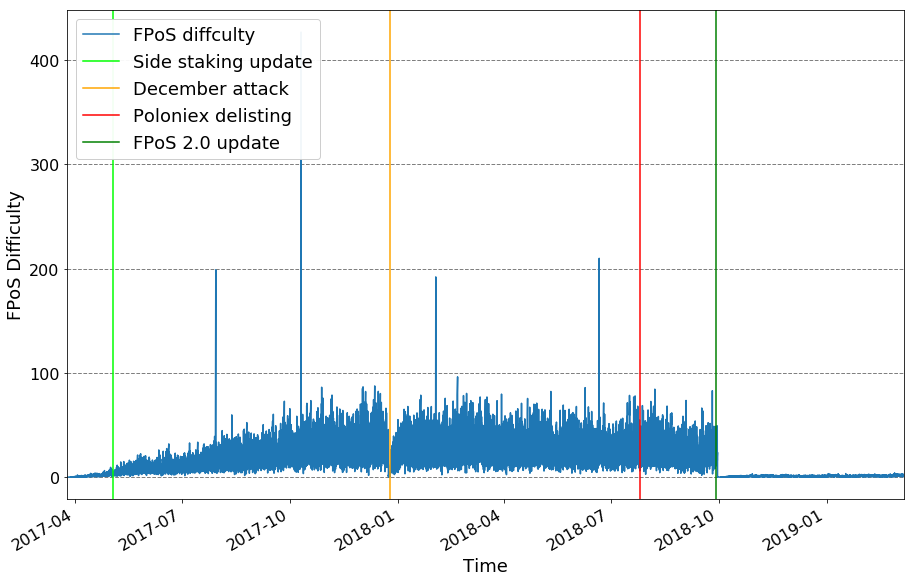

In [44]:
diff_fpos_data.plot(
    y="difficulty",
    figsize=(15, 10),
    label="FPoS diffculty"
)

ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel('FPoS Difficulty', fontsize=18)

plt.axvline(x=datetime(2017, 5, 3), ymin=0, ymax=2, color="lime", label="Side staking update")
plt.axvline(x=datetime(2017, 12, 25), ymin=0, ymax=2, color="orange", label="December attack")
plt.axvline(x=datetime(2018, 7,26), ymin=0, ymax=2, color="red", label="Poloniex delisting")
plt.axvline(x=datetime(2018, 9, 29), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")

plt.legend(loc="upper left", framealpha=0.95, prop={"size": 18});

## Average FPoS difficulty

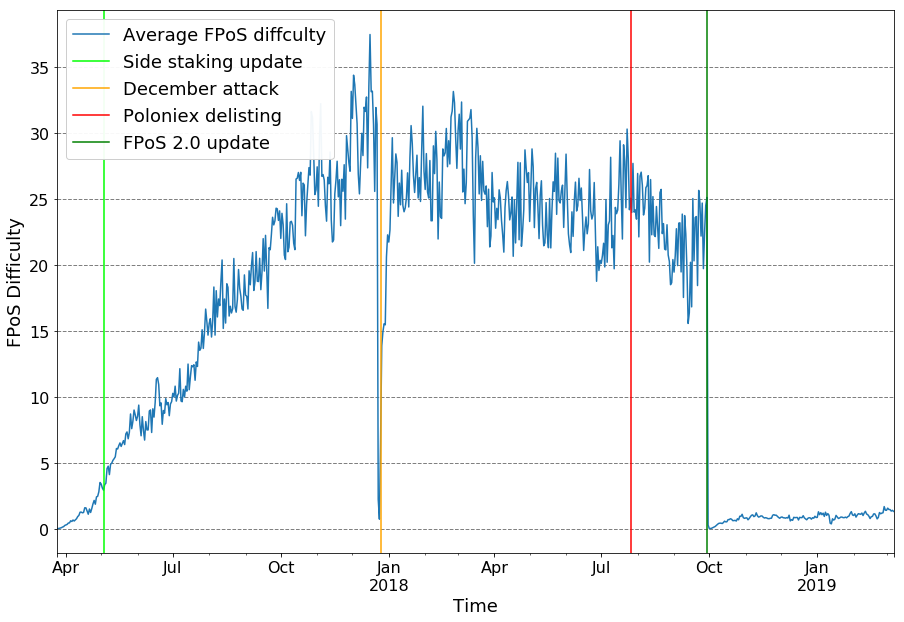

In [45]:
av_diff_fpos_data.plot(
    y="av_diff",
    figsize=(15, 10),
    label="Average FPoS diffculty"
)

ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel('FPoS Difficulty', fontsize=18)

plt.axvline(x=datetime(2017, 5, 3), ymin=0, ymax=2, color="lime", label="Side staking update")
plt.axvline(x=datetime(2017, 12, 25), ymin=0, ymax=2, color="orange", label="December attack")
plt.axvline(x=datetime(2018, 7,26), ymin=0, ymax=2, color="red", label="Poloniex delisting")
plt.axvline(x=datetime(2018, 9, 29), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")

plt.legend(loc="upper left", framealpha=0.95, prop={"size": 18});

In [48]:
FPoS20_start_date = "2018-10-01 00:00:00"
fpos_fpos20_data = av_diff_fpos_data.truncate(before=pd.Timestamp(FPoS20_start_date))

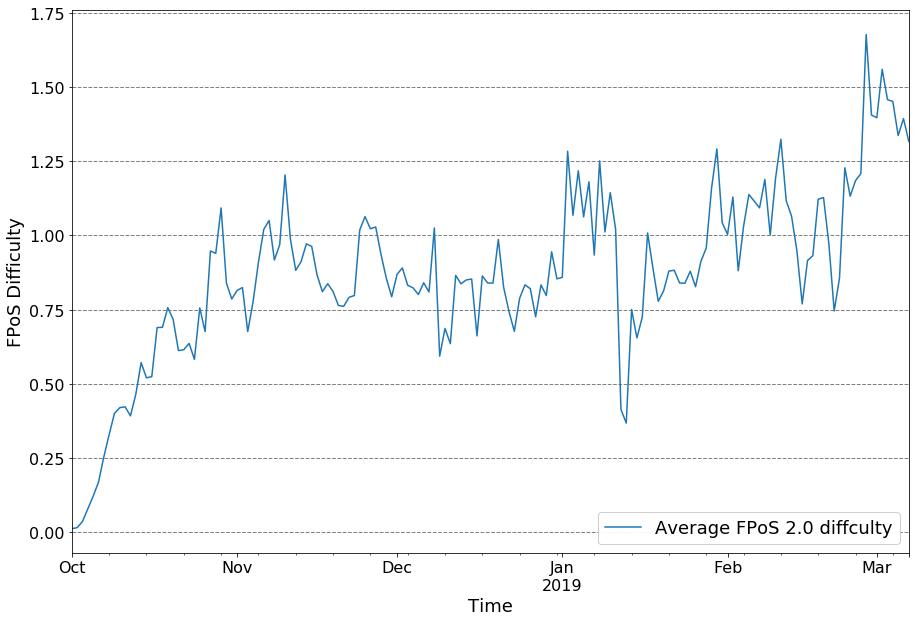

In [52]:
fpos_fpos20_data.plot(
    y="av_diff",
    figsize=(15, 10),
    label="Average FPoS 2.0 diffculty"
)

ax = plt.gca()

ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel('FPoS Difficulty', fontsize=18)

plt.legend(loc="lower right", framealpha=0.95, prop={"size": 18});

In [71]:
def plot_multi(data, cols=None, col_labels=None, spacing=.1, **kwargs):

    from pandas import plotting

    if cols is None: cols = data.columns
    if col_labels is None: cols = data.columns
    if len(cols) == 0: return
    colors = getattr(getattr(plotting, "_style"), "_get_standard_colors")(num_colors=len(cols))

    # First axis
    ax = data.loc[:, cols[0]].plot(label=col_labels[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=col_labels[0], fontsize=18)
    lines, labels = ax.get_legend_handles_labels()

    plt.xlabel("Time", fontsize=18)

    ax.tick_params(axis="both", which="major", labelsize=24)
    ax.tick_params(axis="both", which="major", labelsize=16)

    for n in range(1, len(cols)):
        ax_new = ax.twinx()
        ax_new.spines["right"].set_position(("axes", 1 + spacing*(n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=col_labels[n], color=colors[n % len(colors)])
        ax_new.set_ylabel(ylabel=col_labels[n], fontsize=18)

        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label
        
        ax_new.tick_params(axis="both", which="major", labelsize=24)
        ax_new.tick_params(axis="both", which="major", labelsize=16)

    ax.legend(lines, labels, loc="upper center", prop={"size": 18})

    return ax

In [72]:
fpos20_data = pd.merge(
    pos_fpos20_data,
    fpos_fpos20_data,
    on='date', how='outer'
)

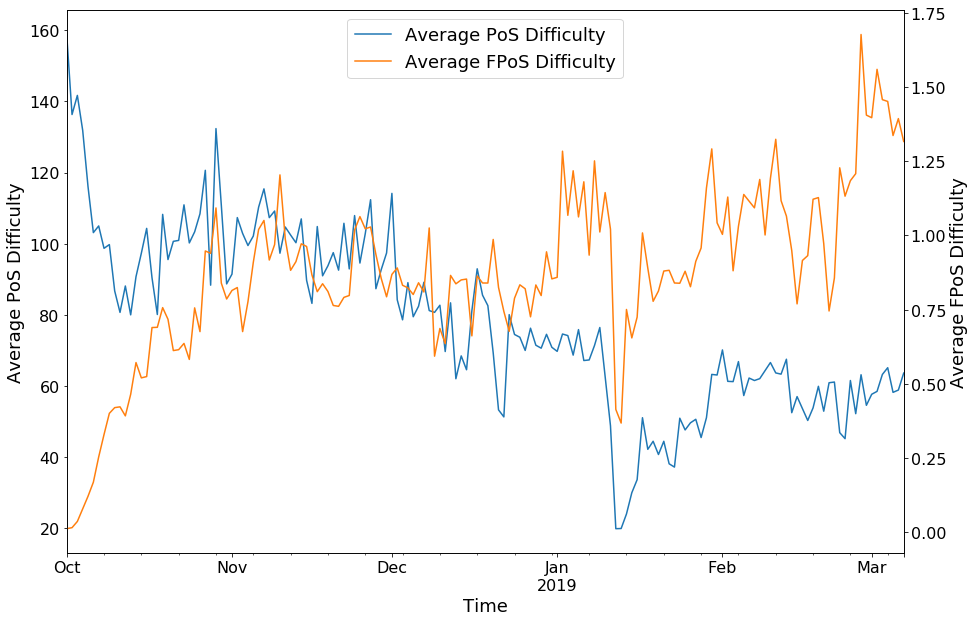

In [73]:
data = pd.DataFrame()

plot_multi(fpos20_data[["av_diff_x", "av_diff_y"]],\
           col_labels=["Average PoS Difficulty", "Average FPoS Difficulty"], figsize=(15, 10));